<a href="https://colab.research.google.com/github/ahrami/PackProj/blob/main/Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

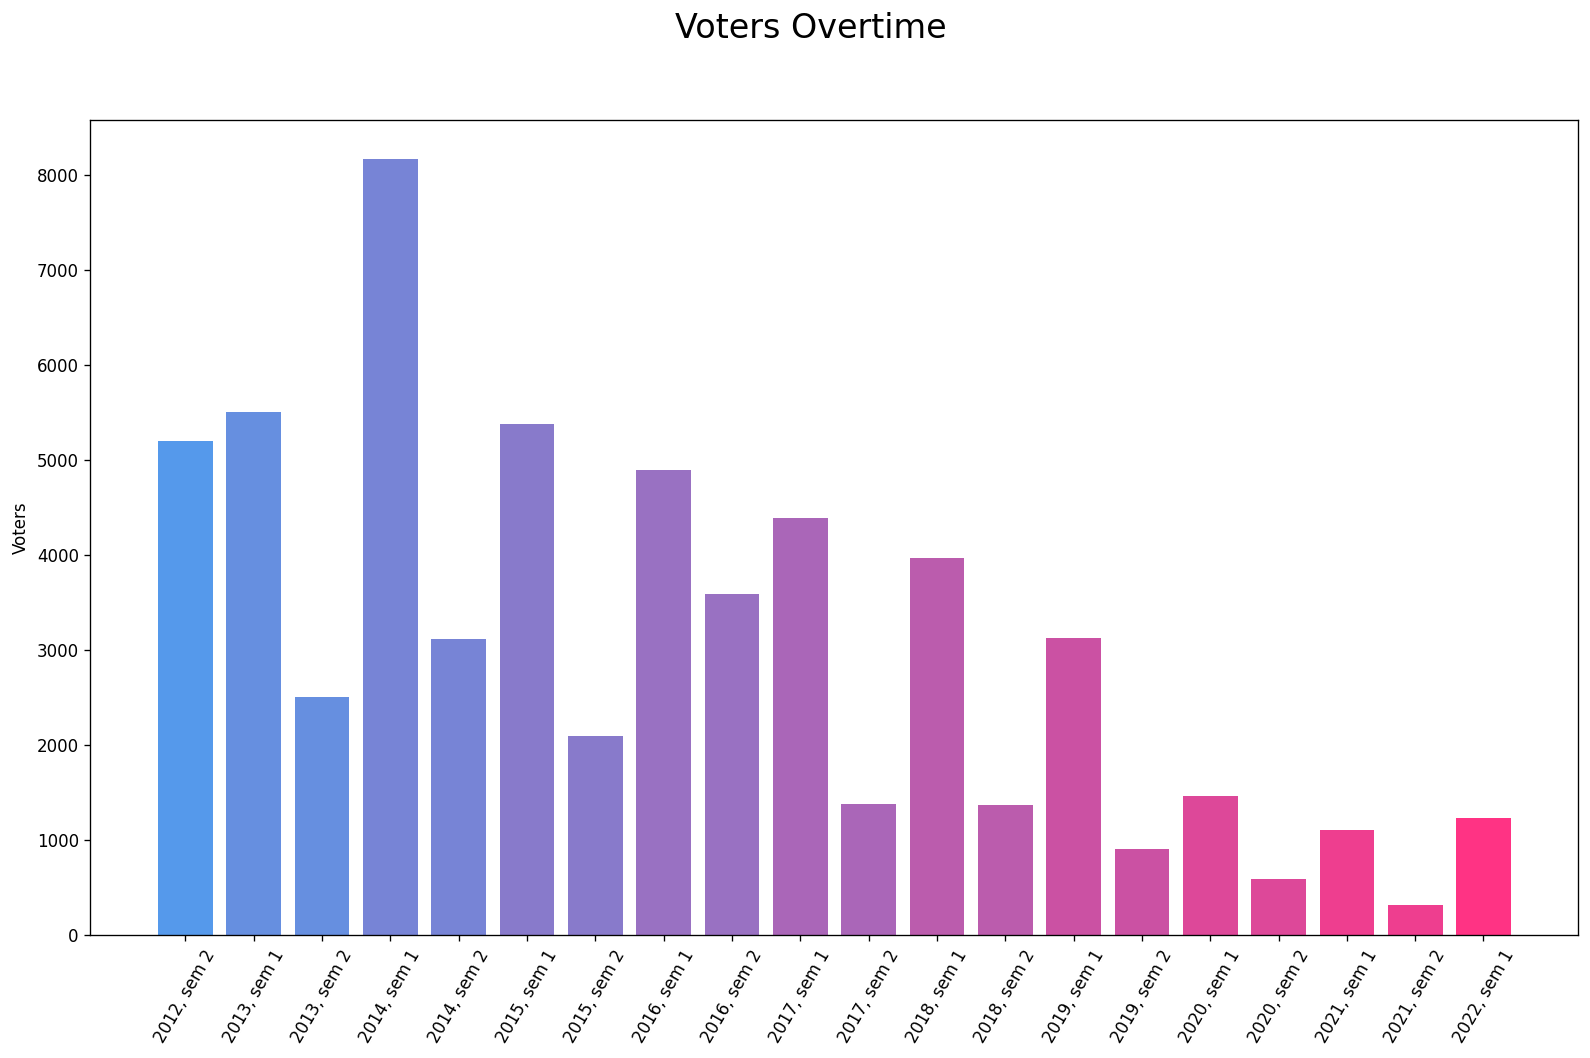

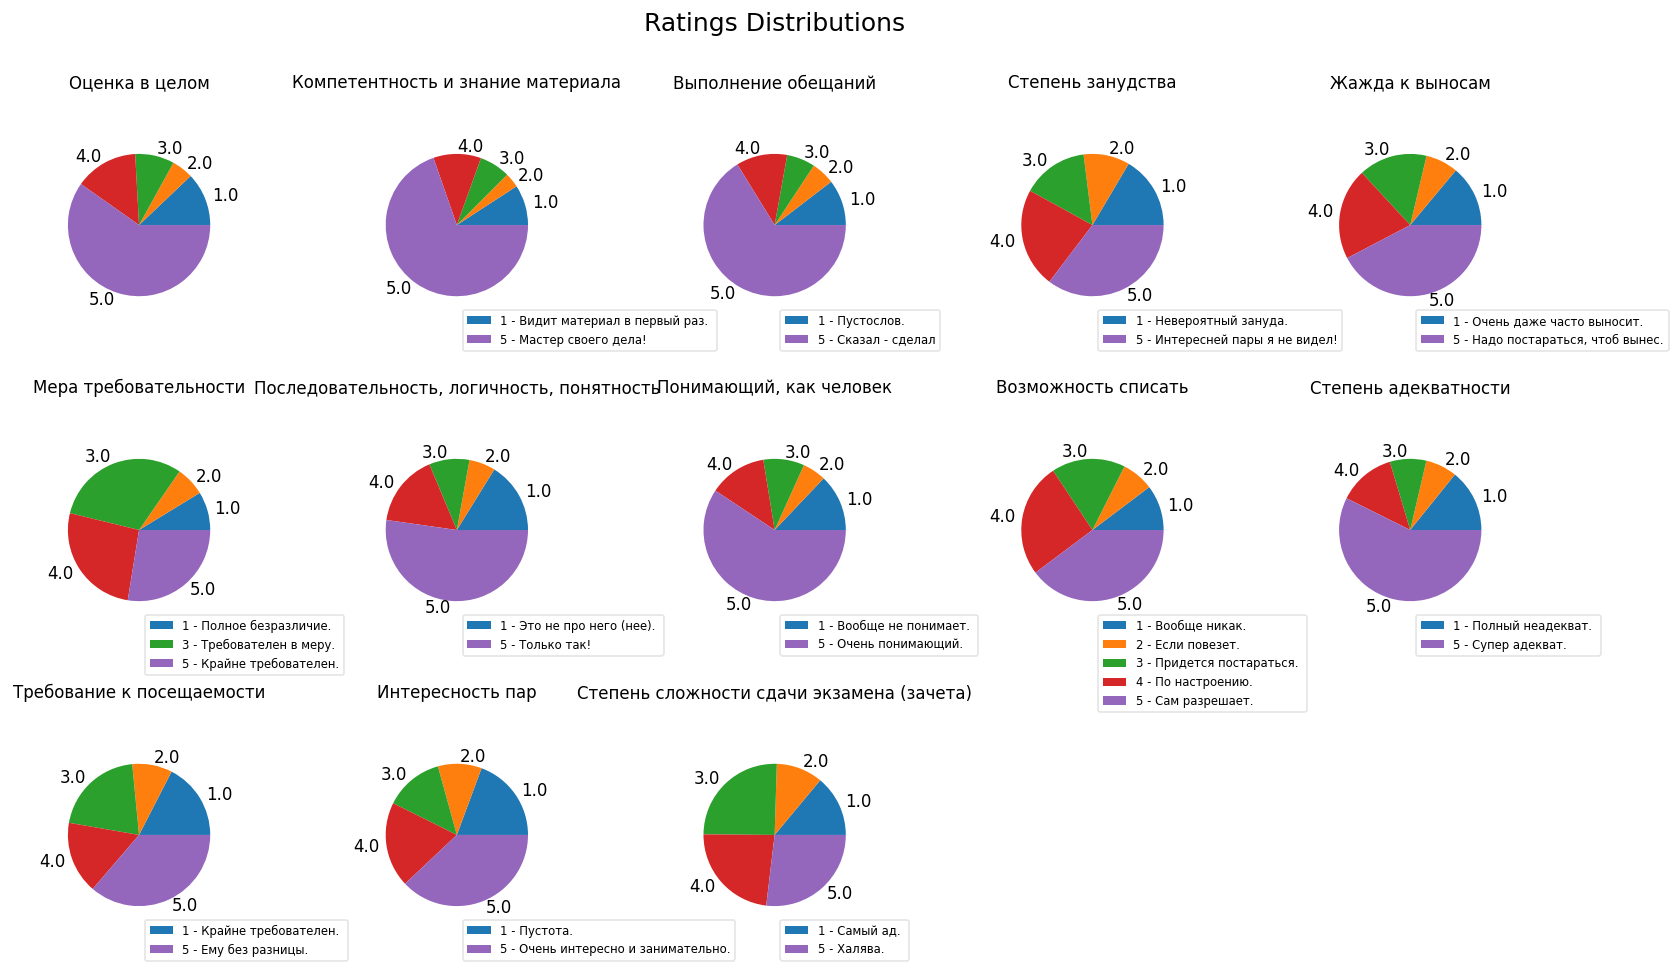

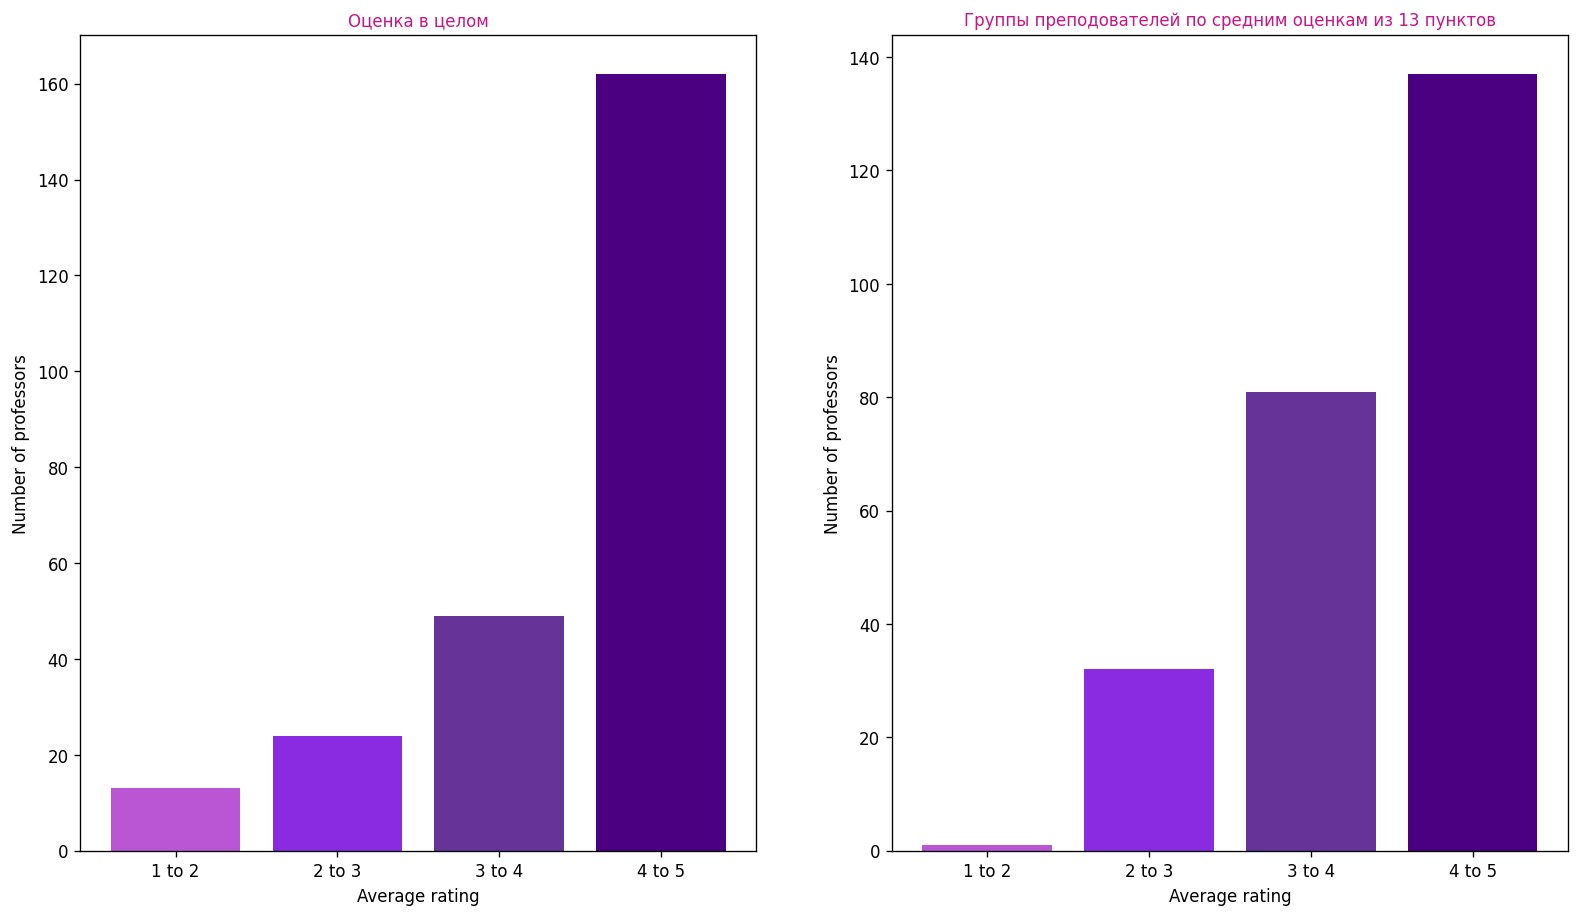

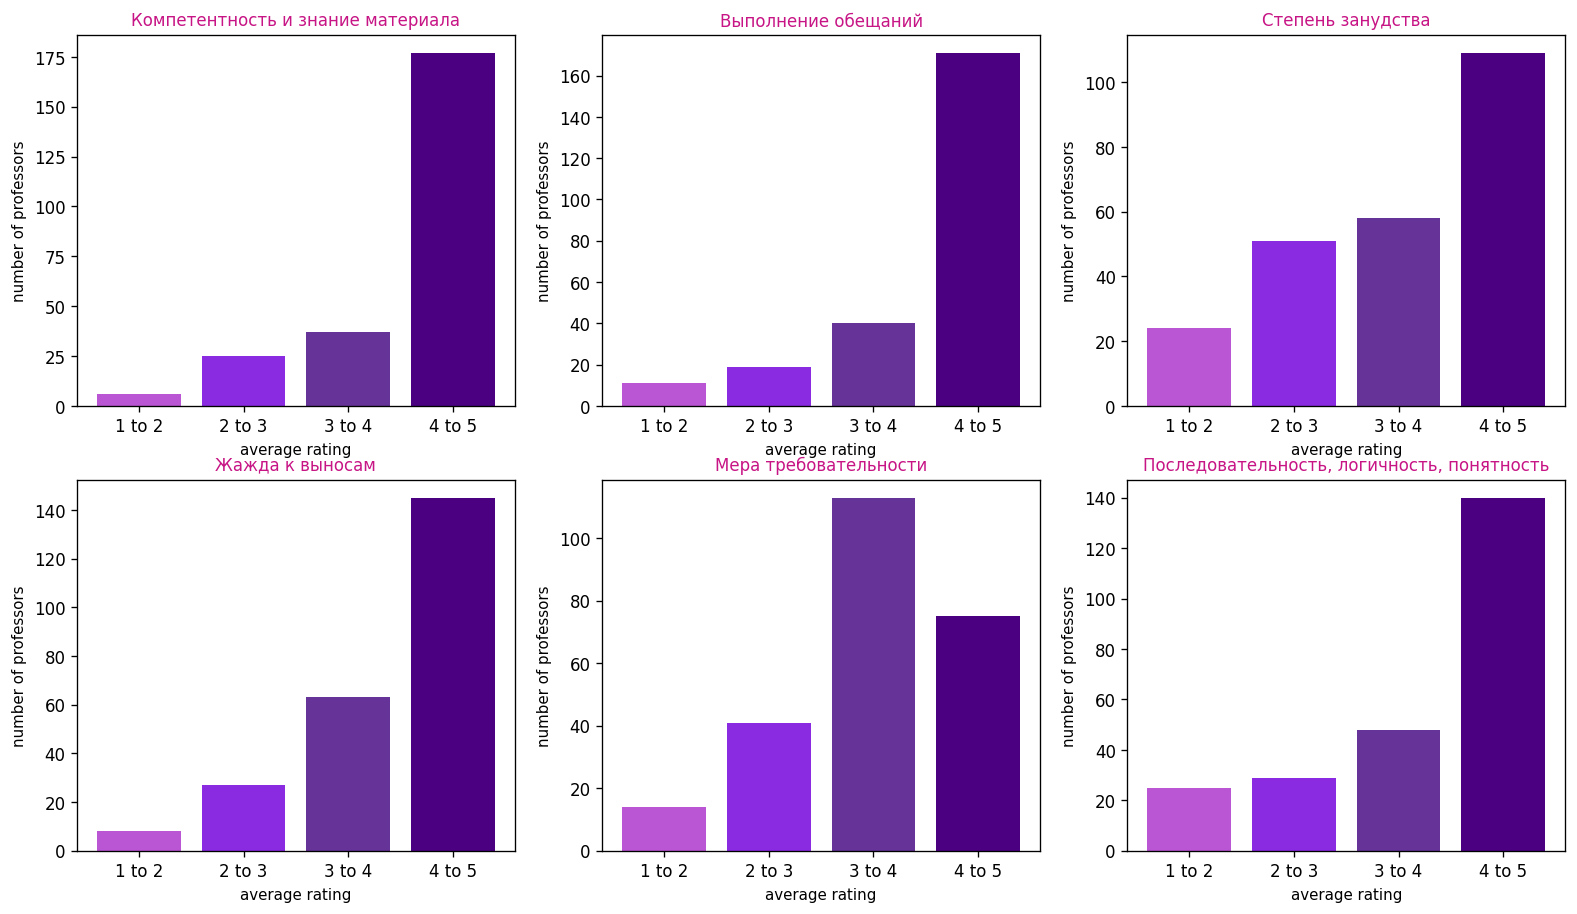

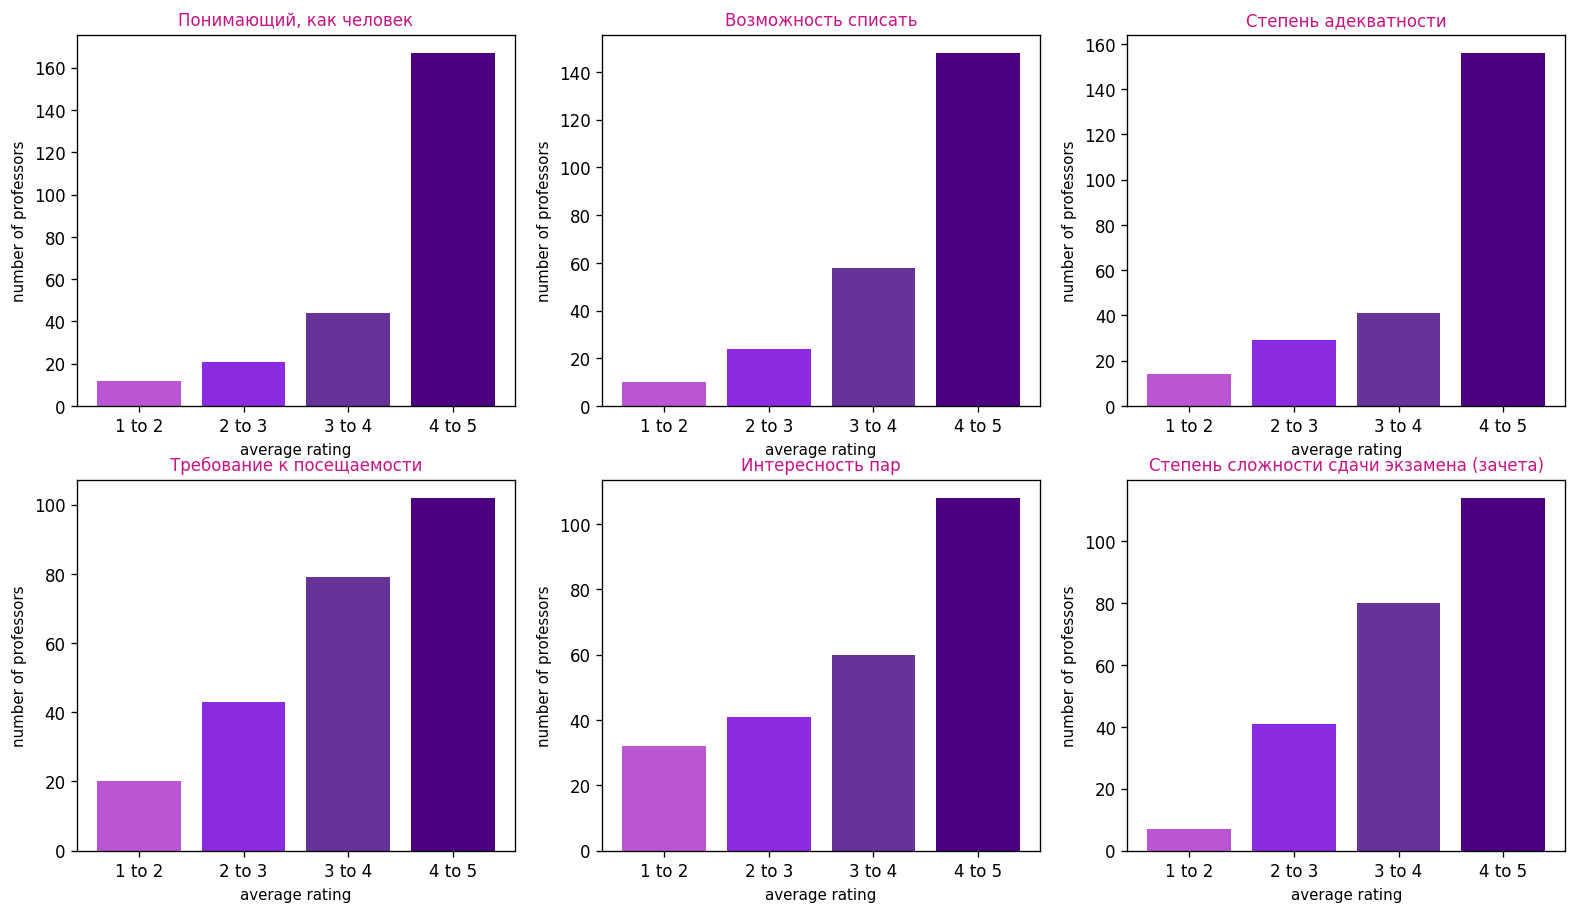

In [ ]:
#1 сколько учащихся и за какие периоды голосовало
#2 оценить общие распределения оценок по каждому показателю
#3 выявить группы преподавателей по оценкам (высокие, средние, низкие) – в общем и по каждому признаку
#4 любые другие оценки по вашему выбору

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


df = pd.read_csv('staffmarks.csv', sep=';', parse_dates = ['dt'])
descr = pd.read_csv('ratingsdecsription.csv', sep=';')

###################################################################
figure1 = plt.figure('Overtime', figsize=(16, 9), dpi=120)
figure1.suptitle('Voters Overtime', fontsize=20)
overtime = df['dt'].groupby([df['dt'].dt.year, df['dt'].dt.month > 6]).count()

xlabel = list()
for i in range(overtime.size):
    xlabel.append('%s, sem %s' % (overtime.axes[0][i][0], 1 + int(overtime.axes[0][i][1])))

plt.xticks(rotation=60, fontsize=10)
ax = plt.gca()
ax.set_xlabel('')
ax.set_ylabel('Voters', fontsize=10)

colors = list()
for i in range(overtime.size):
    colors.append(((overtime.axes[0][i][0] - 2010.) / 12., (2022. - overtime.axes[0][i][0]) / 20.,
                   (2030. - overtime.axes[0][i][0]) / 20., 0.8))

plt.bar(range(len(overtime)), overtime.values, tick_label=xlabel, color=colors)


###################################################################

def TryNum(x):
    try:
        int(x)
        return True
    except:
        return False


rtype = [0] * len(descr['rtype'])
for i in range(len(rtype)):
    rv = dict()
    curDesc = descr['descr'][i]
    d = ''
    if (type(curDesc) == str):
        s = 0
        cur = 0
        while True:
            if s >= len(curDesc):
                if cur > 0:
                    rv[cur] = d
                break
            if TryNum(curDesc[s]):
                if cur > 0:
                    rv[cur] = d
                cur = int(curDesc[s])
                d = ''
            if s >= len(curDesc):
                break
            d += curDesc[s]
            s += 1
    rtype[i] = (descr['name'][i], rv)

figure2, axs = plt.subplots(3, 5, figsize=(16, 9), dpi=120)
figure2.canvas.manager.set_window_title('Distributions')
figure2.suptitle('Ratings Distributions', fontsize=15)
figure2.delaxes(axs[2, 4])
figure2.delaxes(axs[2, 3])
figure2.subplots_adjust(0.1, 0.1, 0.9, 0.9)
for i in range(len(rtype)):
    ax = axs[i // 5 % 3, i % 5]
    plt.sca(ax)
    ax.set_title(rtype[i][0], fontsize=10)
    val = df['rvalue'].where(df['rtype'] == i + 1).value_counts().sort_index()
    val.plot.pie(radius=0.7)

    handles = []
    labels = []
    for val in rtype[i][1]:
        labels.append(rtype[i][1][val])
        handles.append(ax.get_legend_handles_labels()[0][val - 1])
    if (len(labels) > 0):
        ax.legend(handles=handles, labels=labels, fontsize=7, loc='upper left', bbox_to_anchor=(0.5, -0.31, 0.5, 0.5),
                  framealpha=0.5)
    ax.set_xlabel('')
    ax.set_ylabel('')
###################################################################
###################################################################
rtypeList = rtype
staff = 'staff'
dt = 'dt'
rtype = 'rtype'
rvalue = 'rvalue'

barColor = ['mediumorchid', 'blueviolet', 'rebeccapurple', 'indigo']
titleColor = 'mediumvioletred'

professors = set(df[staff])
professors_points = dict.fromkeys(professors, 0)
num_of_votes_for_each_professor = dict.fromkeys(professors, 0)
for i in range(len(df[staff])):
    professors_points[df[staff][i]] += float(df[rvalue][i])
    num_of_votes_for_each_professor[df[staff][i]] += 1

for id in professors_points:
    professors_points[id] /= num_of_votes_for_each_professor[id]
    
intervals = [0]*14
num_in_interval = [0]*14
intervals[13] = ['1 to 2', '2 to 3', '3 to 4', '4 to 5']
num_in_interval[13] = [0, 0, 0, 0]

for id in professors_points:
    if 1 <= professors_points[id] < 2:
        num_in_interval[13][0] += 1
    if 2 <= professors_points[id] < 3:
        num_in_interval[13][1] += 1
    if 3 <= professors_points[id] < 4:
        num_in_interval[13][2] += 1
    if 4 <= professors_points[id] <= 5:
        num_in_interval[13][3] += 1

professors_points = [0]*13
num_of_votes_for_each_professor = [0]*13
for i in range(13):
    professors_points[i] = dict.fromkeys(professors, 0)
    num_of_votes_for_each_professor[i] = dict.fromkeys(professors, 0)

for i in range(len(df[staff])):
    for j in range(13):
        if df[rtype][i] == j + 1:
            professors_points[j][df[staff][i]] += float(df[rvalue][i])
            num_of_votes_for_each_professor[j][df[staff][i]] += 1
for i in range(13):  
    for id in professors_points[i]:
        if num_of_votes_for_each_professor[i][id] != 0:
            professors_points[i][id] /= num_of_votes_for_each_professor[i][id]

for i in range(13): 
    intervals[i] = ['1 to 2', '2 to 3', '3 to 4', '4 to 5']
    num_in_interval[i] = [0, 0, 0, 0]
for i in range(13):
    for id in professors_points[i]:
        if 1 <= professors_points[i][id] < 2:
            num_in_interval[i][0] += 1
        if 2 <= professors_points[i][id] < 3:
            num_in_interval[i][1] += 1
        if 3 <= professors_points[i][id] < 4:
            num_in_interval[i][2] += 1
        if 4 <= professors_points[i][id] <= 5:
            num_in_interval[i][3] += 1

avg_points_prof_figure1 = plt.figure('Общая оценка', figsize=(16, 9), dpi=120)
plt.subplot(1, 2, 1)
plt.xlabel('Average rating')
plt.ylabel('Number of professors')
plt.bar(intervals[0], num_in_interval[0], color=barColor)
plt.title(rtypeList[0][0], fontsize=10,  color=titleColor)
plt.subplot(1, 2, 2)
plt.xlabel('Average rating')
plt.ylabel('Number of professors')
plt.bar(intervals[13], num_in_interval[13], color=barColor)
plt.title('Группы преподователей по средним оценкам из 13 пунктов', fontsize=10,  color=titleColor)

avg_points_prof_figure2 = plt.figure('Группы преподавателей по критериям: 2 - 7', figsize=(16, 9), dpi=120)
for i in range(1, 7):
    plt.subplot(2, 3, i)
    plt.bar(intervals[i], num_in_interval[i], color=barColor)
    plt.title(rtypeList[i][0], fontsize=10,  color=titleColor)
    plt.xlabel('average rating', fontsize=9)
    plt.ylabel('number of professors', fontsize=9)

avg_points_prof_figure3 = plt.figure('Группы преподавателей по критериям: 8 - 13', figsize=(16, 9), dpi=120)
for i in range(7, 13):
    plt.subplot(2, 3, i-6)
    plt.bar(intervals[i], num_in_interval[i], color=barColor)
    plt.title(rtypeList[i][0], fontsize=10,  color=titleColor)
    plt.xlabel('average rating', fontsize=9)
    plt.ylabel('number of professors', fontsize=9)
plt.show()

